In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import seaborn as sns
# Read csv file into a pandas dataframe

zomato=pd.read_csv('preprocessed_data.csv',sep=',', encoding='latin-1') #read csv

In [2]:
zomato.head()

,rate,votes,location,rest_type,dish_liked,cuisines
0,4.1,775,Banashankari,Casual Dining,Pasta Lunch Buffet Masala Papad Paneer Lajawab...,North Indian Mughlai Chinese
1,4.1,787,Banashankari,Casual Dining,Momos Lunch Buffet Chocolate Nirvana Thai Gree...,Chinese North Indian Thai
2,3.8,918,Banashankari,Cafe Casual Dining,Churros Cannelloni Minestrone Soup Hot Chocola...,Cafe Mexican Italian
3,3.7,88,Banashankari,Quick Bites,Masala Dosa,South Indian North Indian
4,3.8,166,Basavanagudi,Casual Dining,Panipuri Gol Gappe,North Indian Rajasthani


D:\anakonda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

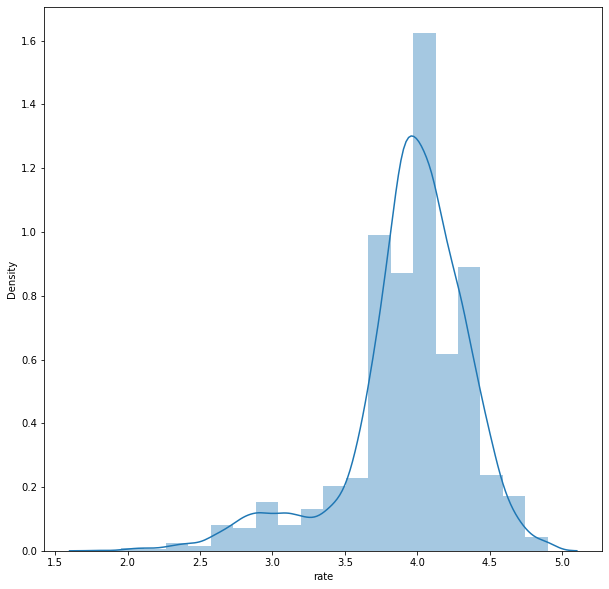

In [6]:
#how rating are distributed
fig = plt.gcf()
fig.set_size_inches(10,10)

sns.distplot(zomato['rate'], bins=20)

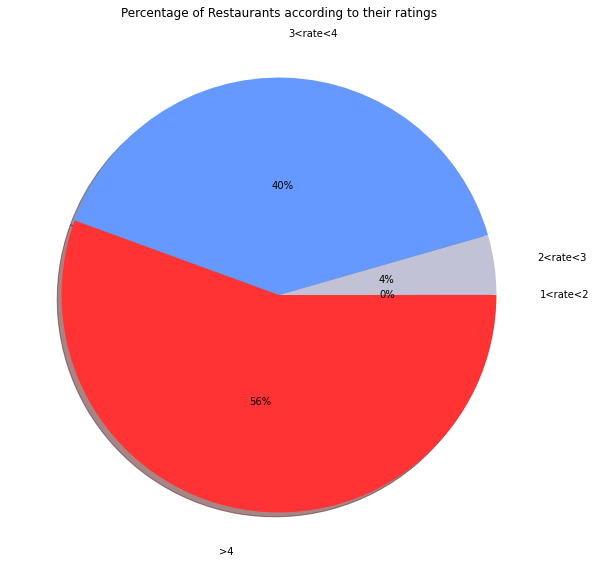

In [8]:
slices=[((zomato['rate']>=1) & (zomato['rate']<2)).sum(),
        ((zomato['rate']>=2) & (zomato['rate']<3)).sum(),
        ((zomato['rate']>=3) & (zomato['rate']<4)).sum(),
        (zomato['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

D:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of Service')

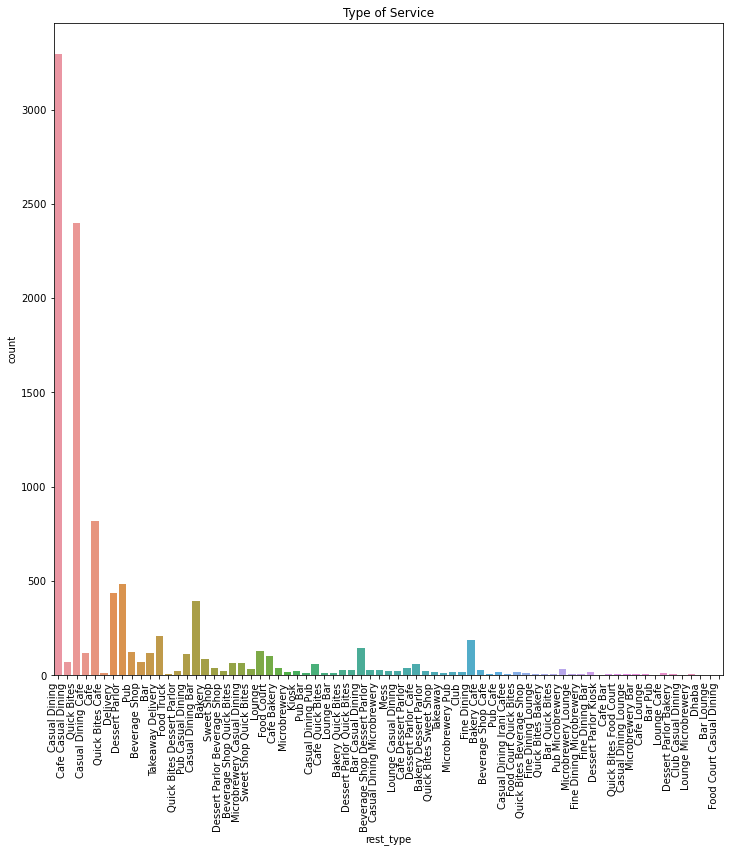

In [9]:
#Types of Services

sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

In [11]:
import re

zomato.index = range(zomato.shape[0])
likes = []
for i in range(zomato.shape[0]):
    array_split = re.split(',', zomato['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [12]:
print("Count of Most liked dishes in Banglore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Banglore


Biryani                                                                                                85
Chicken Biryani                                                                                        32
Paratha                                                                                                27
Waffles                                                                                                25
Pizza                                                                                                  24
Friendly Staff                                                                                         23
Masala Dosa                                                                                            19
Coffee                                                                                                 18
Burgers                                                                                                16
Mutton Biryani                                

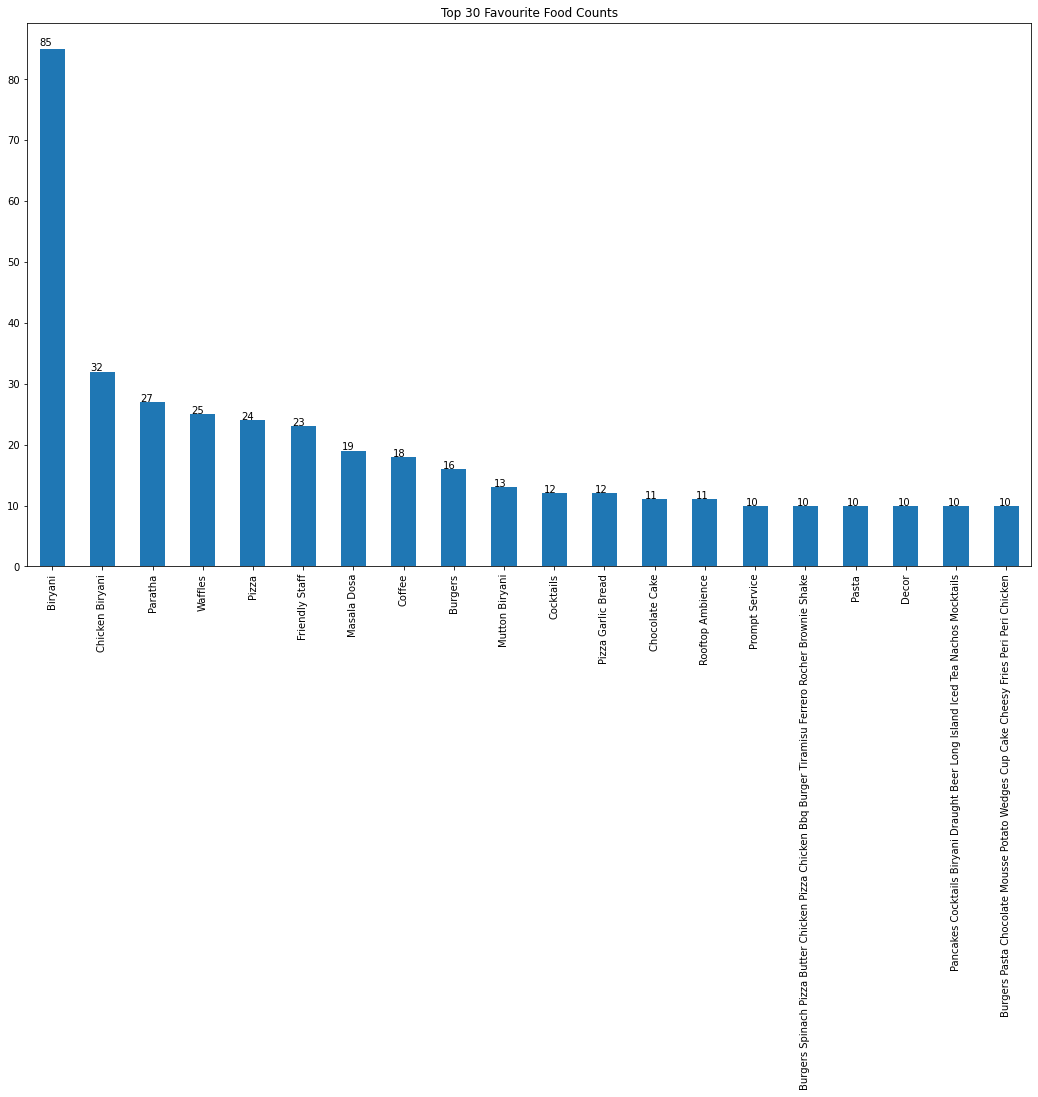

In [13]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar', 
         figsize=(18, 10), title='Top 30 Favourite Food Counts')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.005, 
            i.get_height()*1.005))

TypeError: 'tuple' object is not callable

In [15]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10274 entries, 0 to 10273
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rate        10274 non-null  float64
 1   votes       10274 non-null  int64  
 2   location    10274 non-null  object 
 3   rest_type   10274 non-null  object 
 4   dish_liked  10274 non-null  object 
 5   cuisines    10274 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 481.7+ KB
